In [1]:
from pathlib import Path
import torch
import torch.nn as nn
from torchvision import transforms
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pyquaternion import Quaternion
import cv2
import pandas as pd

import time
from collections import deque, defaultdict

import habitat
from habitat.config import Config
from habitat.config.default import get_config
from habitat.core.env import Env
from habitat.sims.habitat_simulator.actions import HabitatSimActions

# from habitat_baselines.rl.ddppo.policy.resnet import ResNet, resnet50, se_resneXt50
# from habitat_baselines.rl.ppo import PointNavBaselinePolicy
from habitat_baselines.agents.ppo_agents import PPOAgent
from gym.spaces import Box, Dict, Discrete

root = Path('../frames')
transform_ = transforms.ToPILImage()

In [2]:
models = {
#     'rgb':   '/Users/nimit/Documents/robomaster/habitat/models/v2/gibson-2plus-mp3d-train-val-test-se-resneXt50-rgb.pth',
#     'depth': '/Users/nimit/Documents/robomaster/habitat/models/v2/gibson-2plus-resnet50.pth',
#     'depth': '/Users/nimit/Documents/robomaster/habitat/models/v2/gibson-4plus-resnet50.pth',
    'rgb':   '/Users/nimit/Documents/robomaster/habitat/models/v2/ppo/rgb.pth',
    'depth': '/Users/nimit/Documents/robomaster/habitat/models/v2/ppo/depth.pth'
}

configs = {
#     'rgb':   '/Users/nimit/Documents/robomaster/habitat/habitat2robomaster/rgb_test.yaml',
    'depth': '/Users/nimit/Documents/robomaster/habitat/habitat2robomaster/configs/pointgoal/ppo/val.yaml',
#     'depth': '/Users/nimit/Documents/robomaster/habitat/habitat-api/habitat_baselines/config/pointnav/ddppo_pointnav.yaml'
}

In [3]:
c = Config()

c.RESOLUTION       = 256
c.HIDDEN_SIZE      = 512
c.RANDOM_SEED      = 7

c.INPUT_TYPE       = 'depth'
c.MODEL_PATH       = models[c.INPUT_TYPE]
c.GOAL_SENSOR_UUID = 'pointgoal_with_gps_compass'

c.freeze()

env = Env(config=get_config(configs[c.INPUT_TYPE]))
agent = PPOAgent(c)

2020-04-19 08:07:36,394 Initializing dataset PointNav-v1
2020-04-19 08:07:36,397 initializing sim Sim-v0
I0419 08:07:38.304250 28496 simulator.py:142] Loaded navmesh /Users/nimit/Documents/robomaster/habitat/habitat-api/data/scene_datasets/habitat-test-scenes/skokloster-castle.navmesh
2020-04-19 08:07:38,308 Initializing task Nav-v0


In [7]:
agent.reset()
env.episode_iterator._iterator = iter(env.episode_iterator.episodes)
observations = env.reset()

k = 10
rgb_k  = np.zeros((k, 256, 256, 3), dtype=np.uint8)
meta_k = np.zeros((k, 2), dtype=np.float)

# i = 0
num_eps = 25
eps = np.zeros(num_eps)
for ep in range(num_eps):
    while not env.episode_over:
        state = env.sim.get_agent_state()
#         print(env.get_metrics()['distance_to_goal'])
#         start = np.array(env.current_episode.start_position)
#         goal = np.array(env.current_episode.goals[0].position)
        curr = np.array(state.sensor_states['rgb'].position)
#         print(np.linalg.norm(curr[[0,2]]-goal[[0,2]]))

        action = agent.act(observations)
        print(action, curr)
        
        observations = env.reset()
    eps[ep] = int(env.current_episode.episode_id)
#     if i == k:
#         break

#     cv2.imshow('rgb', observations['rgb'])
#     cv2.imshow('rgb', observations['depth'])
#     cv2.waitKey(1)

#     observations = env.step(action)
#     rgb_k[i:,] = observations['rgb']
#     meta_k[i:,] = observations['pointgoal_with_gps_compass']

#     i += 1

# metrics = env.get_metrics()
# print(metrics)

# cv2.destroyWindow('rgb')

{'action': 2} [-1.2676634  1.4547853 12.5954275]
{'action': 2} [ 5.658443   1.2599186 19.127396 ]
{'action': 1} [ 5.017864   1.2599186 18.954199 ]
{'action': 1} [-3.5598257  1.4848957 19.476954 ]
{'action': 3} [ 4.453005   1.4375027 11.428614 ]
{'action': 1} [-1.1805642  1.2623237 22.649378 ]
{'action': 2} [0.10885884 1.2599186  4.1559157 ]
{'action': 1} [-3.144482   1.3851457 10.55563  ]
{'action': 1} [-1.6763525  1.2599186  5.464835 ]
{'action': 2} [ 2.8750243  1.4089671 11.167679 ]
{'action': 1} [ 1.032903   1.4599186 13.650094 ]
{'action': 2} [-7.202365   1.4599186 16.424662 ]
{'action': 1} [-2.2744894  1.420583  11.840111 ]
{'action': 2} [-0.83835816  1.5140784  24.213287  ]
{'action': 2} [-6.6215     1.4599186 17.733437 ]
{'action': 1} [-7.05683    1.4256387 15.726928 ]
{'action': 1} [-5.913623   1.3927184 18.855694 ]
{'action': 1} [ 0.1163235  1.4513836 16.98354  ]
{'action': 3} [-1.9540851  1.4724308 16.433464 ]
{'action': 2} [-6.9310565  1.4599186 11.486977 ]
{'action': 1} [-2

KeyboardInterrupt: 

In [6]:
env.get_metrics()

{'distance_to_goal': 6.335183143615723,
 'success': 0.0,
 'spl': 0.0,
 'collisions': None,
 'no_success_spl': 1.0}

In [148]:
state.sensor_states

{'rgb': SixDOFPose(position=array([-1.2676634,  1.4547853, 12.5954275], dtype=float32), rotation=quaternion(0.891185760498047, 0, 0.45363849401474, 0)),
 'depth': SixDOFPose(position=array([-1.2676634,  1.4547853, 12.5954275], dtype=float32), rotation=quaternion(0.891185760498047, 0, 0.45363849401474, 0)),
 'semantic': SixDOFPose(position=array([-1.2676634,  1.4547853, 12.5954275], dtype=float32), rotation=quaternion(0.891185760498047, 0, 0.45363849401474, 0))}

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 <a list of 50 Patch objects>)

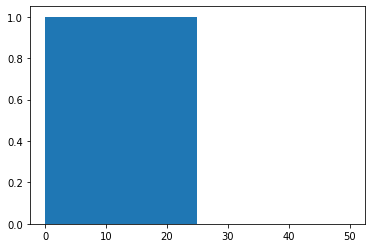

In [66]:
plt.hist(eps, bins=50, range=(0,50))

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 <a list of 50 Patch objects>)

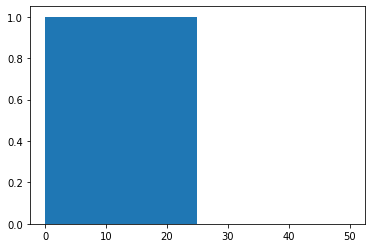

In [68]:
plt.hist(eps, bins=50, range=(0,50))

## DDPPO

In [2]:
from pathlib import Path
import numpy as np
import torch

from gym.spaces import Box, Dict, Discrete

from habitat_baselines.rl.ddppo.policy.resnet_policy import PointNavResNetPolicy
from habitat_baselines.common.utils import batch_obs

# MODEL
observation_spaces, action_spaces = Dict({
#     'depth': Box(low=0, high=1, shape=(256, 256, 1), dtype=np.float32),
    'rgb': Box(low=0, high=255, shape=(256, 256, 3), dtype=np.uint8),
    'pointgoal_with_gps_compass': Box( 
        low=np.finfo(np.float32).min,
        high=np.finfo(np.float32).max,
        shape=(2,),
        dtype=np.float32,
    ),
}), Discrete(4)

actor_critic = PointNavResNetPolicy(
    observation_space=observation_spaces,
    action_space=action_spaces,
    hidden_size=512,
    rnn_type='LSTM',
    num_recurrent_layers=2,
    backbone='resnet50',
    goal_sensor_uuid='pointgoal_with_gps_compass',
    normalize_visual_inputs='rgb' in observation_spaces.spaces.keys()
)

# DATA
batch = { # move to GPU
#     'depth': torch.stack([torch.from_numpy(np.float64(observations['depth']))], dim=0).to(dtype=torch.float),
    'rgb': torch.stack([torch.from_numpy(np.float64(observations['rgb']))], dim=0).to(dtype=torch.float),
    'pointgoal_with_gps_compass': torch.stack([torch.from_numpy(np.float64(observations['pointgoal_with_gps_compass']))], dim=0).to(dtype=torch.float)
}


# TRAIN
test_recurrent_hidden_states = torch.zeros(actor_critic.net.num_recurrent_layers, 1, 512) # move to GPU
not_done_masks = torch.zeros(1, 1) # move to GPU
prev_actions = torch.zeros(1, 1, dtype=torch.long) # move to GPU

gt_action = torch.LongTensor([3])

optim = torch.optim.Adam(actor_critic.parameters())
criterion = torch.nn.CrossEntropyLoss()

for _ in range(10):
    optim.zero_grad()

    # NOTE: from habitat_baselines/agents/ppo_agents.py#137
    # must replace:
    # * self.test_recurrent_hidden_states
    # * self.prev_actions
    # * self.not_done_masks
    _, actions, action_log_probs, test_recurrent_hidden_states = actor_critic.act(
        batch,
        test_recurrent_hidden_states.detach(),
        prev_actions,
        not_done_masks,
        deterministic=False)
    #  Make masks not done till reset (end of episode) will be called
    not_done_masks = torch.ones(1, 1) # move to GPU
    prev_actions.copy_(actions)

    loss = criterion(actor_critic.prev_distribution.logits, gt_action)
    print(loss)

    loss.backward()
    optim.step()

NameError: name 'observations' is not defined

In [4]:
from model import ConditionalStateEncoderImitation
net = ConditionalStateEncoderImitation(batch_size=1)

action = torch.LongTensor([1, 2, 3, 1, 2, 3, 1, 2, 3, 1])

optim = torch.optim.Adam(net.parameters())
criterion = torch.nn.CrossEntropyLoss()

for i in range(0, 10, 1):
    rgb  = torch.Tensor(rgb_k[i:i+1]) #torch.stack([torch.from_numpy(np.float64(observations['rgb']))], dim=0).to(dtype=torch.float)
    meta = torch.Tensor(meta_k[i:i+1]) #torch.stack([torch.from_numpy(np.float64(observations['pointgoal_with_gps_compass']))], dim=0).to(dtype=torch.float)

    optim.zero_grad()

    # NOTE: from habitat_baselines/agents/ppo_agents.py#137
    _action = net((rgb, meta))
    loss = criterion(_action, action[i:i+1])

    loss.backward()
    optim.step()

NameError: name 'rgb_k' is not defined

# Sequence Batching

In [1]:
from habitat_dataset import get_dataset
import torch
from model import ConditionalStateEncoderImitation
import time
import numpy as np

In [7]:
batch_size = 1
net = ConditionalStateEncoderImitation(batch_size=batch_size)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

optim = torch.optim.Adam(net.parameters())
criterion = torch.nn.CrossEntropyLoss()
net.train()

methods = ['backprop', 'tbptt', 'wwtbptt']
method = methods[1]
k1 = 20 # frequency of TBPTT
k2 = 10 # length of TBPTT

data_train, data_val = get_dataset('test', rnn=True, batch_size=batch_size)

for rgb, action, prev_action, meta, mask in data_train:
    net.clean()

    max_sequence_length = rgb.shape[0]
    sequence_length_capacity = 20

    tbptt = method == 'tbptt'
    if method == 'tbptt':
        truncate_indices = np.arange(0, rgb.shape[0])
        indices = np.where((truncate_indices % k1 == k2)|(truncate_indices % k1 == 0))[0]
    else:
        indices = range(0, max_sequence_length, sequence_length_capacity) # chunking

    start_t = time.time()
    sequence_loss = 0
    for i, start in enumerate(indices):
        if method == 'tbptt':
            end = indices[i+1] if i+1 < len(indices) else max_sequence_length
        else:
            end = min(start+sequence_length_capacity, max_sequence_length)
        
        chunk_loss = 0
        net.hidden_states.detach_()
        for t in range(start, end):
            _action = net((rgb[t], meta[t], prev_action[t], mask[t]))

            loss = criterion(_action, action[t])
            chunk_loss += loss
            if not tbptt:
                net.hidden_states.detach_()

        if optim:
            chunk_loss.backward()

            print(start, end, time.time()-start_t, tbptt)
            start_t = time.time()

            optim.step()
            optim.zero_grad()

        chunk_loss.detach_() # free memory
        sequence_loss += chunk_loss.item()

        if method == 'tbptt':
            tbptt = not tbptt

train: 8
val: 2
0 10 2.390673875808716 True
10 20 2.355952262878418 False
20 30 2.1955690383911133 True
30 40 2.1660096645355225 False
40 50 2.2508528232574463 True
50 60 2.2607991695404053 False
60 70 2.1949381828308105 True
70 80 2.1611058712005615 False
80 90 2.1571903228759766 True
90 100 2.1585001945495605 False
100 110 2.1812689304351807 True
110 120 2.1482138633728027 False
120 130 2.234640121459961 True
130 140 2.205038070678711 False
140 146 1.3862640857696533 True
0 10 2.129240036010742 True
10 20 2.182265281677246 False
20 30 2.158850908279419 True
30 40 2.1640069484710693 False
40 50 2.1796798706054688 True
0 10 2.227360963821411 True
10 20 2.140601873397827 False
20 30 2.1553428173065186 True
30 40 2.163849115371704 False
40 50 2.1651108264923096 True
50 60 2.1502721309661865 False
60 70 2.1773948669433594 True
70 80 2.2815487384796143 False
80 90 2.1836397647857666 True
90 100 2.1757240295410156 False
100 110 2.257678985595703 True
110 120 2.1483192443847656 False
120 130

KeyboardInterrupt: 

In [90]:
import numpy as np
import matplotlib.pyplot as plt

k1 = 30
k2 = 20

T = 200
truncate_indices = np.arange(0, T)
truncate_indices = np.where((truncate_indices % k1 == k2)|(truncate_indices % k1 == 0))

In [47]:
k1 = 8
k2 = 5

s = ''
for t in range(50):
    bptt = t % k1 < k2
    s += str(int(bptt))
s # 1 means we are doing BPTT, 0 means detach

'11111000111110001111100011111000111110001111100011'

---
# Episodes vs Samples

In [4]:
from habitat_dataset import get_dataset
data_train, data_val = get_dataset('test', rnn=True, batch_size=2)

train: 2
val: 2


In [5]:
for x in data_train:
    print('tick')

tick
tick
tick
tick


KeyboardInterrupt: 